# **CS412 - Machine Learning - Fall 2025**
## **Homework 1**
100 pts


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Gain experience with text processing


## **Dataset**
This dataset is taken from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com) and modified for Homework 1. It provides data on patient reviews on specific drugs along with related conditions and a patient rating reflecting overall satisfaction.



Columns:

**drugName:** Name of the drug

**rating:** Patient rating of the drug over 10 stars

**review:** Patient review of the drug

**usefulCount:** Number of users who found the review useful

**condition:** Name of the condition




❗ **Download the data from SuCourse.** It's named **cs412_hw1_dataset.csv**.

You must use 80% of the data for training and 20% for test.


## **Task**
Build a decision tree classifier using the Scikit-Learn library to predict conditions - given in **Target column** condition.


## **Software: You may find the necessary function references here:**
https://scikit-learn.org/1.5/api/sklearn.feature_extraction.html

http://scikit-learn.org/stable/supervised_learning.html


## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS412-HW1.ipynb. Submit the ipynb to SuCourse.



## 1) Load the Dataset

*   Read the .csv file with the pandas library


In [ ]:
# Code here



## 2) Understanding the dataset & Preprocessing (30 pts)

Understanding the Dataset: (10 pts)


> - Find the shape of the dataset (number of samples & number of attributes) (Hint: You can use the **shape** function).

> - Display variable names (both dependent and independent).

> - Display the summary of the dataset (Hint: You can use the **info** function).

> - Display the first 5 rows from training dataset (Hint: You can use the **head** function).




Preprocessing: (20 pts)


> - Check if there are any missing values in the dataset. If there are, drop these values.

> - Process the text data. Use the **TfidfVectorizer** from the Scikit-Learn Library. Using the **TfidfVectorizer** function, remove stop words by setting **stop_words="english"** and limit your vocabulary by setting **max_features=1000**.

> - Encode categorical data (Hint: You can use the **LabelEncoder** from the Scikit-Learn Library).



In [ ]:
# Code here



## 3) Define X and y. Split the dataset. (10 pts)

> - Define X and y. (5 pts)
>   
> - Split the data into training and test sets (Hint: Use the **train_test_split** method from **sklearn.model_selection**). (5 pts)


In [ ]:
# Code here



## 4) Tune Hyperparameters (15 pts)


> - Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 3. Use validation accuracy to pick the best hyperparameter values. (10 pts)
>   
> - Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)


In [ ]:
# Code here



**Fill the blanks below:**

> - I chose to tune hyperparameters __________, and ________.
> - I chose these hyperparameters because __________________.

## 5) Re-train the decision tree with the hyperparameters you have chosen (10 pts)

 > - Re-train model with the hyperparameters you have chosen in part 4. (5 pts)

 >  - Report training accuracy. (5 pts)

In [ ]:
# Code here



## 6) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 5. (5 pts)
- Report the classification accuracy. (5 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (10 pts)
> The model most frequently mistakes class(es) _________ for class(es) _________.



In [ ]:
# Code here



**Fill the blanks:** The model most frequently mistakes class(es) _________ for class(es) _________.

## 7) Find the information gain on the first split (15 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
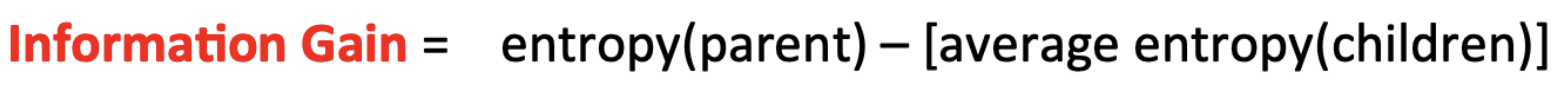



In [ ]:
# Code here

